In [583]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [584]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [585]:
len(words)

32033

In [586]:
chars = sorted(list(set(''.join(words))))
stoi = {}
for i, char in enumerate(chars):
  stoi[char] = i + 1

stoi['.'] = 0

itos = {}

for s, i in stoi.items():
    itos[i] = s

In [587]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [588]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [589]:
block_size = 3 # context length
X, Y  = [], []
for w in words[:]:
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [590]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [591]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [592]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [593]:
C = torch.randn((27, 2))

In [594]:
C

tensor([[-0.3854,  0.1668],
        [ 0.4757, -1.9860],
        [-0.6732,  1.9906],
        [-1.4659, -0.2739],
        [ 0.0191, -0.8462],
        [-1.7762, -0.0958],
        [ 0.6440, -2.3463],
        [-0.5045,  0.0525],
        [-0.3976,  0.3253],
        [-0.2818, -1.1549],
        [ 0.5402, -0.6524],
        [-0.5226,  0.4600],
        [-0.0945,  0.6483],
        [-1.4058,  1.2458],
        [ 0.1193,  2.4715],
        [ 0.1503,  2.0680],
        [-0.5277,  0.2824],
        [-0.4083, -0.7777],
        [ 2.5865, -0.6067],
        [ 0.3345,  1.1433],
        [ 1.4892, -0.2911],
        [-0.9602,  1.5238],
        [ 1.1324,  0.9054],
        [ 0.4448, -0.5347],
        [-1.0922, -1.9392],
        [ 0.5103,  0.5874],
        [-0.3610, -0.2429]])

In [595]:
F.one_hot(torch.tensor(5), num_classes = 27).float()

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [596]:
C[5]

tensor([-1.7762, -0.0958])

In [597]:
F.one_hot(torch.tensor(5), num_classes = 27).float().shape

torch.Size([27])

In [598]:
F.one_hot(torch.tensor(5), num_classes = 27).float() @ C

tensor([-1.7762, -0.0958])

In [599]:
C[[5,6,7]]

tensor([[-1.7762, -0.0958],
        [ 0.6440, -2.3463],
        [-0.5045,  0.0525]])

In [600]:
C[torch.tensor([5,6,7])]

tensor([[-1.7762, -0.0958],
        [ 0.6440, -2.3463],
        [-0.5045,  0.0525]])

In [601]:
C[X]

tensor([[[-0.3854,  0.1668],
         [-0.3854,  0.1668],
         [-0.3854,  0.1668]],

        [[-0.3854,  0.1668],
         [-0.3854,  0.1668],
         [-1.7762, -0.0958]],

        [[-0.3854,  0.1668],
         [-1.7762, -0.0958],
         [-1.4058,  1.2458]],

        ...,

        [[-0.3610, -0.2429],
         [-0.3610, -0.2429],
         [ 0.5103,  0.5874]],

        [[-0.3610, -0.2429],
         [ 0.5103,  0.5874],
         [-0.3610, -0.2429]],

        [[ 0.5103,  0.5874],
         [-0.3610, -0.2429],
         [-1.0922, -1.9392]]])

In [602]:
X[13, 2]

tensor(1)

In [603]:
C[X][13, 2]

tensor([ 0.4757, -1.9860])

In [604]:
C[1]

tensor([ 0.4757, -1.9860])

In [605]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [606]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [607]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([228146, 6])

In [608]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([228146, 6])

In [609]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [610]:
a.shape

torch.Size([18])

In [611]:
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [612]:
emb.view(emb.shape[0], 6).shape


torch.Size([228146, 6])

In [613]:
torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)

tensor([[-0.5079,  0.0220,  0.9169,  ..., -0.9025,  0.9706,  0.1090],
        [-0.5770,  0.8925,  0.9874,  ..., -0.9989,  0.8954,  0.5648],
        [-0.9893, -0.8292,  0.9036,  ..., -0.9998,  0.9992,  0.0806],
        ...,
        [-0.4406, -0.7330,  0.3702,  ..., -0.1539,  0.9779, -0.1549],
        [ 0.7567,  0.9290,  0.9372,  ..., -0.4284,  0.5719,  0.7324],
        [-0.3065,  0.5780,  0.9986,  ...,  0.9593,  0.9433, -0.9809]])

In [614]:
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)

In [615]:
h.shape

torch.Size([228146, 100])

In [616]:
W2 = torch.rand((100, 27))
b2 = torch.randn(27)

In [617]:
logits = h @ W2 + b2

In [618]:
logits.shape

torch.Size([228146, 27])

In [619]:
counts = logits.exp()
prob = counts  / counts.sum(1, keepdim = True)

In [620]:
prob.shape

torch.Size([228146, 27])

In [621]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [622]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g, requires_grad=True)
W1 = torch.randn((6, 100), generator=g, requires_grad=True)
b1 = torch.randn(100, generator=g, requires_grad=True)
W2 = torch.rand((100, 27), generator=g, requires_grad=True)
b2 = torch.randn(27, generator=g, requires_grad=True)
parameters= [C, W1, b1, W2, b2]

In [623]:
total = 0
for p in parameters:
    n = p.nelement()
    total += n

total

3481

In [624]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [625]:
lri = []
lossi = []
for i in range(1000):
  # minibatch
  ix = torch.randint(0, X.shape[0], (32,))

  # forward
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y[ix])
  #print(loss)

  # backward
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = lrs[i]
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  lri.append(lre[i])
  lossi.append(loss.item())

print(loss.item())

4.2611775398254395


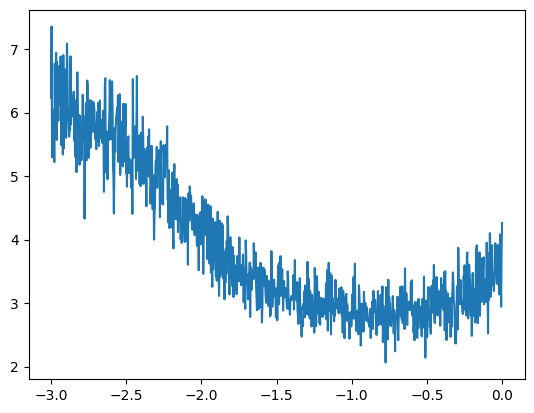

In [626]:
plt.plot(lri, lossi)

In [627]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g, requires_grad=True)
W1 = torch.randn((6, 100), generator=g, requires_grad=True)
b1 = torch.randn(100, generator=g, requires_grad=True)
W2 = torch.rand((100, 27), generator=g, requires_grad=True)
b2 = torch.randn(27, generator=g, requires_grad=True)
parameters= [C, W1, b1, W2, b2]

In [628]:
total = 0
for p in parameters:
    n = p.nelement()
    total += n

total

3481

In [629]:
lri = []
lossi = []
for i in range(10000):
  # minibatch
  ix = torch.randint(0, X.shape[0], (32,))

  # forward
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y[ix])
  #print(loss)

  # backward
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad

print(loss.item())

2.177483081817627


In [630]:
# one more time with decay
lri = []
lossi = []
for i in range(10000):
  # minibatch
  ix = torch.randint(0, X.shape[0], (32,))

  # forward
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y[ix])
  #print(loss)

  # backward
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  ##################################### DECAY
  lr = 0.001
  for p in parameters:
    p.data += -lr * p.grad

print(loss.item())

2.2947750091552734


In [631]:
# 80 10 10 split

In [632]:
len(words)

32033

In [633]:
def build_dataset(words):
  block_size = 3
  X, Y = [], []
  for w in words:
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

In [634]:
import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [638]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g, requires_grad=True)
W1 = torch.randn((6, 100), generator=g, requires_grad=True)
b1 = torch.randn(100, generator=g, requires_grad=True)
W2 = torch.rand((100, 27), generator=g, requires_grad=True)
b2 = torch.randn(27, generator=g, requires_grad=True)
parameters= [C, W1, b1, W2, b2]

In [639]:
lri = []
lossi = []
for i in range(30000):
  # minibatch
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss)

  # backward
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad

print(loss.item())

2.1473283767700195


In [642]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3271, grad_fn=<NllLossBackward0>)

In [643]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.3147, grad_fn=<NllLossBackward0>)

 increasing the size of the NN

In [653]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g, requires_grad=True)
W1 = torch.randn((6, 300), generator=g, requires_grad=True)
b1 = torch.randn(300, generator=g, requires_grad=True)
W2 = torch.rand((300, 27), generator=g, requires_grad=True)
b2 = torch.randn(27, generator=g, requires_grad=True)
parameters= [C, W1, b1, W2, b2]

In [654]:
lri = []
lossi = []
stepi = []

for i in range(30000):
  # minibatch
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss)

  # backward
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  lossi.append(loss.item())
  stepi.append(i)

print(loss.item())

2.4210331439971924


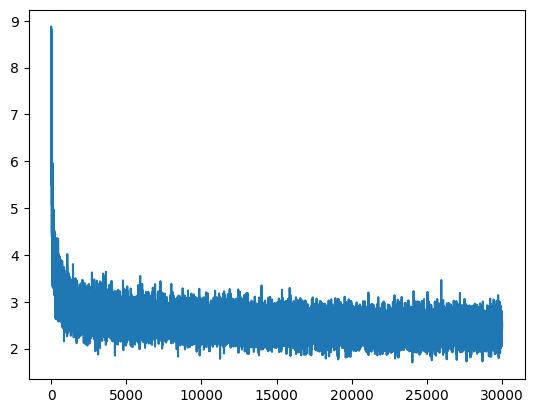

In [655]:
plt.plot(stepi, lossi)

In [656]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3958, grad_fn=<NllLossBackward0>)

In [657]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.3938, grad_fn=<NllLossBackward0>)

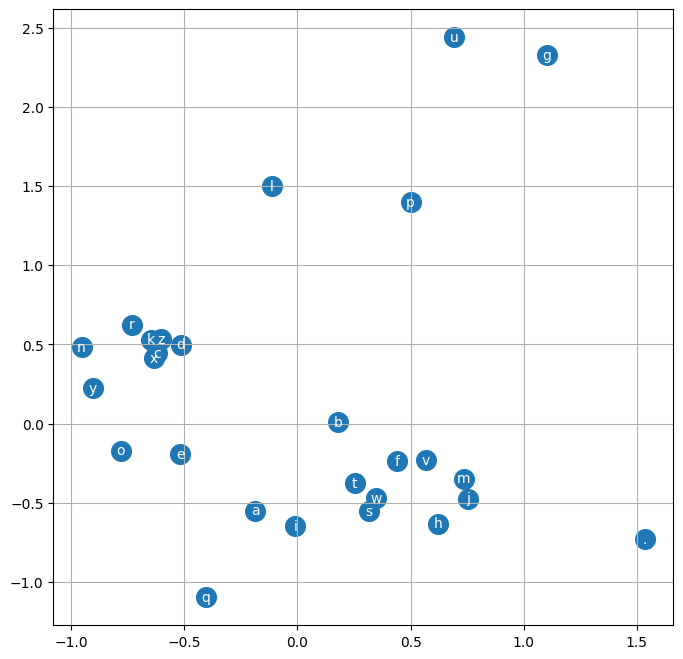

In [658]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [663]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g, requires_grad=True)
W1 = torch.randn((30, 200), generator=g, requires_grad=True)
b1 = torch.randn(200, generator=g, requires_grad=True)
W2 = torch.rand((200, 27), generator=g, requires_grad=True)
b2 = torch.randn(27, generator=g, requires_grad=True)
parameters= [C, W1, b1, W2, b2]

In [670]:
lri = []
lossi = []
stepi = []

for i in range(30000):
  # minibatch
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss)

  # backward
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  lossi.append(loss.log10().item())
  stepi.append(i)

print(loss.item())

2.103041887283325


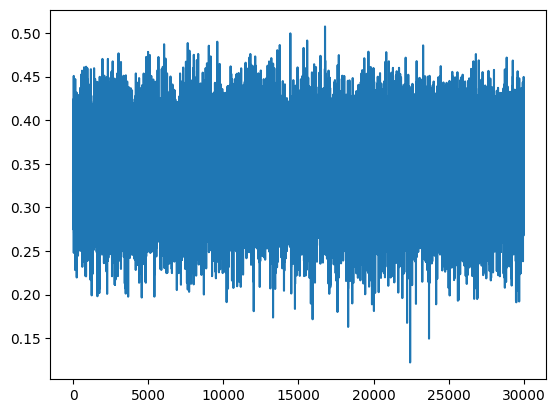

In [671]:
plt.plot(stepi, lossi)

In [672]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2302, grad_fn=<NllLossBackward0>)

In [673]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.2015, grad_fn=<NllLossBackward0>)

In [674]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

mora.
kmyan.
keel.
ndhlyah.
revurstendrarg.
adejedseliianni.
jen.
eden.
van.
nar.
kayzion.
kamin.
shubnrg.
hiriel.
kindreth.
kox.
terian.
brethder.
yarue.
eli.
